In [127]:
import pandas as pd
import matplotlib.pyplot as plotter
import numpy as np
import seaborn as sas
import csv
import re
sas.set()

In [2]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [3]:
Name_Conversion = {}
with open("Data/Food_Atlas2015/Long Names.txt") as longFile:
    with open("Data/Food_Atlas2015/Short Names.txt") as shortFile:
        longReader = longFile.readlines()
        shortReader = shortFile.readlines()
        longReader = [x.strip() for x in longReader]
        shortReader = [y.strip() for y in shortReader]
        Name_Conversion = dict(zip(shortReader,longReader))
    

In [4]:
Name_Conversion

{'CensusTract': 'Census tract',
 'County': 'County',
 'GroupQuartersFlag': 'Group quarters, tract with high share',
 'HUNVFlag': 'Vehicle access, tract with low vehicle access',
 'LA1and10': 'Low access tract at 1 mile for urban areas and 10 miles for rural areas',
 'LA1and20': 'Low access tract at 1 mile for urban areas and 20 miles for rural areas',
 'LALOWI05_10': 'Low access, low-income population at 1/2 mile for urban areas and 10 miles for rural areas, number',
 'LALOWI1_10': 'Low access, low-income population at 1 mile for urban areas and 10 miles for rural areas, number',
 'LALOWI1_20': 'Low access, low-income population at 1 mile for urban areas and 20 miles for rural areas, number',
 'LAPOP05_10': 'Low access, population at 1/2 mile for urban areas and 10 miles for rural areas, number',
 'LAPOP1_10': 'Low access, population at 1 mile for urban areas and 10 miles for rural areas, number',
 'LAPOP1_20': 'Low access, population at 1 mile for urban areas and 20 miles for rural ar

In [5]:
food_atlas_data = pd.read_csv("Data/Food_Atlas2015/Food_Atlas2015.csv")
food_atlas_data.head()

,CensusTract,State,County,Urban,POP2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


In [6]:
list(food_atlas_data)

['CensusTract',
 'State',
 'County',
 'Urban',
 'POP2010',
 'OHU2010',
 'GroupQuartersFlag',
 'NUMGQTRS',
 'PCTGQTRS',
 'LILATracts_1And10',
 'LILATracts_halfAnd10',
 'LILATracts_1And20',
 'LILATracts_Vehicle',
 'HUNVFlag',
 'LowIncomeTracts',
 'PovertyRate',
 'MedianFamilyIncome',
 'LA1and10',
 'LAhalfand10',
 'LA1and20',
 'LATracts_half',
 'LATracts1',
 'LATracts10',
 'LATracts20',
 'LATractsVehicle_20',
 'LAPOP1_10',
 'LAPOP05_10',
 'LAPOP1_20',
 'LALOWI1_10',
 'LALOWI05_10',
 'LALOWI1_20',
 'lapophalf',
 'lapophalfshare',
 'lalowihalf',
 'lalowihalfshare',
 'lakidshalf',
 'lakidshalfshare',
 'laseniorshalf',
 'laseniorshalfshare',
 'lawhitehalf',
 'lawhitehalfshare',
 'lablackhalf',
 'lablackhalfshare',
 'laasianhalf',
 'laasianhalfshare',
 'lanhopihalf',
 'lanhopihalfshare',
 'laaianhalf',
 'laaianhalfshare',
 'laomultirhalf',
 'laomultirhalfshare',
 'lahisphalf',
 'lahisphalfshare',
 'lahunvhalf',
 'lahunvhalfshare',
 'lasnaphalf',
 'lasnaphalfshare',
 'lapop1',
 'lapop1share',
 

In [7]:
food_atlas_data.rename(columns = Name_Conversion,inplace = True)

In [8]:
food_atlas_data.head()

,Census tract,State,County,Urban tract,"Population, tract total","Housing units, total","Group quarters, tract with high share","Group quarters, tract population residing in, number","Group quarters, tract population residing in, share",Low income and low access tract measured at 1 mile for urban areas and 10 miles for rural areas,...,"Tract seniors age 65+, number","Tract White population, number","Tract Black or African American population, number","Tract Asian population, number","Tract Native Hawaiian and Other Pacific Islander population, number","Tract American Indian and Alaska Native population, number","Tract Other/Multiple race population, number","Tract Hispanic or Latino population, number","Tract housing units without a vehicle, number","Tract housing units receiving SNAP benefits, number"
0,1001020100,Alabama,Autauga,1,1912,693,0,0,0.000000,0,...,221,1622,217,14,0,14,45,44,26,112
1,1001020200,Alabama,Autauga,1,2170,743,0,181,0.083410,0,...,214,888,1217,5,0,5,55,75,87,202
2,1001020300,Alabama,Autauga,1,3373,1256,0,0,0.000000,0,...,439,2576,647,17,5,11,117,87,108,120
3,1001020400,Alabama,Autauga,1,4386,1722,0,0,0.000000,0,...,904,4086,193,18,4,11,74,85,19,82
4,1001020500,Alabama,Autauga,1,10766,4082,0,181,0.016812,0,...,1126,8666,1437,296,9,48,310,355,198,488


### Location breakdown

In [18]:
code_lookups = pd.read_csv('Data/mapping_info/zip_codes_states.csv')
code_lookups.drop_duplicates(['state','county'],keep='last',inplace=True)
code_lookups['state_name'] = code_lookups.apply(lambda x: states.get(x['state'],None),axis=1)
code_lookups.head()

,zip_code,latitude,longitude,city,state,county,state_name
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas,Puerto Rico
3,602,18.393103,-67.180953,Aguada,PR,Aguada,Puerto Rico
7,606,18.172947,-66.944111,Maricao,PR,Maricao,Puerto Rico
8,610,18.288685,-67.139696,Anasco,PR,Anasco,Puerto Rico
14,617,18.447092,-66.544255,Barceloneta,PR,Barceloneta,Puerto Rico


In [19]:
area_lookups = pd.read_csv('DATA/CountyAreas/DEC_10_SF1_GCTPH1.US05PR_with_ann_MOD.csv', encoding='latin-1')
code_lookups2 = code_lookups.merge(area_lookups, right_on = ['Geographic area','Geographic County'],left_on = ['state_name','county'],how='inner')
code_lookups2.head()

,zip_code,latitude,longitude,city,state,county,state_name,Id,Id2,Geography,...,Target Geo Id2,Geographic area,Geographic County,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing unitsa
0,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas,Puerto Rico,0100000US,NaN,United States,...,72001.0,Puerto Rico,Adjuntas,19483,8125,67.10,0.41,66.69,292.1,121.8
1,602,18.393103,-67.180953,Aguada,PR,Aguada,Puerto Rico,0100000US,NaN,United States,...,72003.0,Puerto Rico,Aguada,41959,18258,45.54,14.69,30.85,1360.0,591.8
2,606,18.172947,-66.944111,Maricao,PR,Maricao,Puerto Rico,0100000US,NaN,United States,...,72093.0,Puerto Rico,Maricao,6276,2740,36.63,0.00,36.62,171.4,74.8
3,617,18.447092,-66.544255,Barceloneta,PR,Barceloneta,Puerto Rico,0100000US,NaN,United States,...,72017.0,Puerto Rico,Barceloneta,24816,10693,30.92,12.22,18.69,1327.6,572.0
4,623,18.062201,-67.149541,Cabo Rojo,PR,Cabo Rojo,Puerto Rico,0100000US,NaN,United States,...,72023.0,Puerto Rico,Cabo Rojo,50917,30206,177.41,107.04,70.37,723.5,429.2


In [20]:
def plotDoubleComparison(largerFrame, numeratorValue, denominatorValue, quart=5):#"Low access, population at 1 mile for urban areas and 20 miles for rural areas, number",'Population, tract total'
    
    #if denominatorValue != 'Population, tract total' and numeratorValue!= 'Population, tract total':
    #    county_food_atlas_groupdata = largerFrame.groupby(['State','County'])[[denominatorValue,numeratorValue,'Population, tract total']].sum()
    #else:
    county_food_atlas_groupdata = largerFrame.groupby(['State','County'])[[denominatorValue,numeratorValue]].sum()
    county_food_atlas_groupdata['ratio']=county_food_atlas_groupdata[numeratorValue]/county_food_atlas_groupdata[denominatorValue]
    county_food_atlas_groupdata.reset_index(inplace=True)
    county_food_atlas_groupdata.head()
    county_food_atlas_loc_data = county_food_atlas_groupdata.merge(code_lookups, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
    #county_food_atlas_loc_data['Population Density'] = county_food_atlas_loc_data['Population, tract total']/county_food_atlas_loc_data['Area in square miles - Land area']
    #county_food_atlas_loc_data.sort_values('Population Density',ascending = True, inplace = True)
    #if quart !=5:
    #    lowerQuart = quart-1
    #    dfSize = len(county_food_atlas_loc_data)/4
    #    county_food_atlas_loc_data = county_food_atlas_loc_data.iloc[lowerQuart*dfSize:quart*dfSize]
    county_food_atlas_loc_data.head()
    plotter.figure(figsize=(20,10))
    plotter.scatter(county_food_atlas_loc_data['longitude'], county_food_atlas_loc_data['latitude'], c=county_food_atlas_loc_data['ratio']*100.0)
    plotter.show()
    return county_food_atlas_loc_data
def plotNationalDoubleComparison(largerFrame, numeratorValue, denominatorValue):#"
    county_food_atlas_groupdata = largerFrame[[denominatorValue,numeratorValue]].sum()
    #county_food_atlas_groupdata['ratio']=county_food_atlas_groupdata[numeratorValue]/county_food_atlas_groupdata[denominatorValue]
    #county_food_atlas_groupdata.reset_index(inplace=True)
    county_food_atlas_groupdata.head()
    county_food_atlas_loc_data = county_food_atlas_groupdata#.merge(code_lookups, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
    county_food_atlas_loc_data.head()
    #plotter.scatter(county_food_atlas_loc_data['longitude'], county_food_atlas_loc_data['latitude'], c=county_food_atlas_loc_data['ratio']*100.0)
    county_food_atlas_loc_data.plot(kind='bar')
    plotter.show()
    return county_food_atlas_loc_data
def plotNationalDoubleRatio(largerFrame, numeratorValue, denominatorValue):#"
    county_food_atlas_groupdata = largerFrame[[denominatorValue,numeratorValue]].sum()
    #county_food_atlas_groupdata['ratio']=county_food_atlas_groupdata[numeratorValue]/county_food_atlas_groupdata[denominatorValue]
    #county_food_atlas_groupdata.reset_index(inplace=True)
    county_food_atlas_groupdata.head()
    county_food_atlas_loc_data = county_food_atlas_groupdata#.merge(code_lookups, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
    county_food_atlas_loc_data.head()
    #plotter.scatter(county_food_atlas_loc_data['longitude'], county_food_atlas_loc_data['latitude'], c=county_food_atlas_loc_data['ratio']*100.0)
    #county_food_atlas_loc_data.plot(kind='bar')
    plotter.show()
    return county_food_atlas_loc_data[numeratorValue]/county_food_atlas_loc_data[denominatorValue]

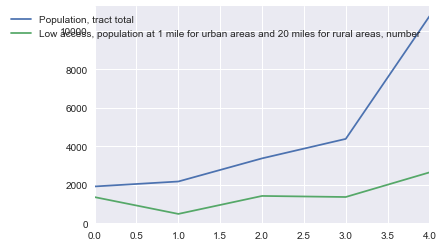

In [105]:
food_atlas_data[['Population, tract total','Low access, population at 1 mile for urban areas and 20 miles for rural areas, number']].head().plot()
plotter.show()

In [85]:
food_atlas_data2 = food_atlas_data[food_atlas_data['State']!='Alaska']
food_atlas_data2 = food_atlas_data2[food_atlas_data2['State']!='Hawaii']
food_atlas_data2 = food_atlas_data2[food_atlas_data2['State']!='Puerto Rico']

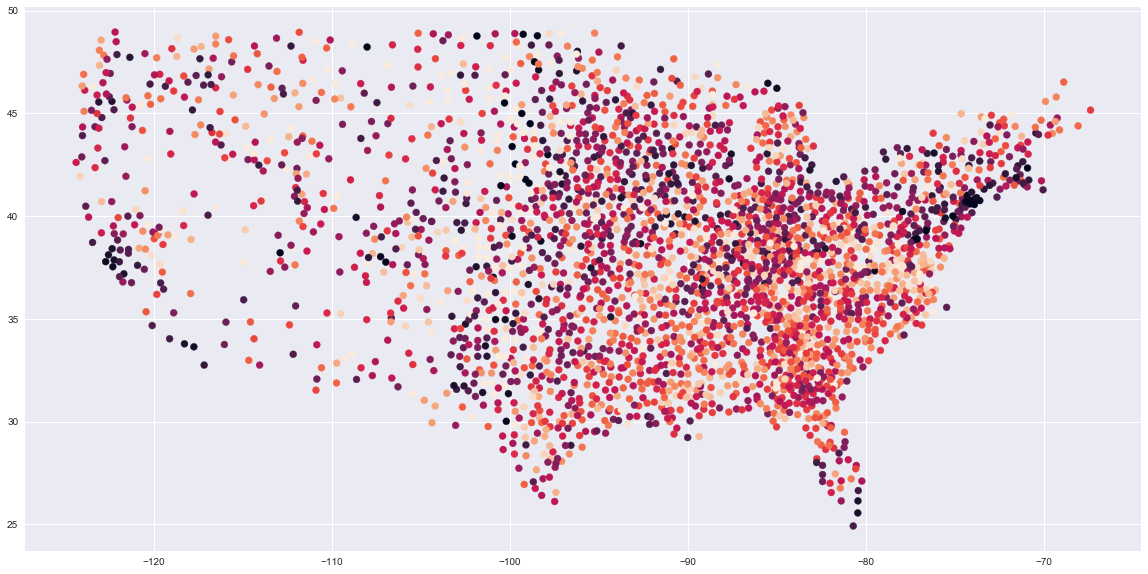

,State,County,"Tract Black or African American population, number","Low access, Black or African American population at 1 mile, number",ratio,zip_code,latitude,longitude,city,state,county,state_name
0,Alabama,Autauga,9643,6645.162299,0.689118,36749,32.510383,-86.813834,Jones,AL,Autauga,Alabama
1,Alabama,Baldwin,17105,10709.565455,0.626107,36580,30.468691,-87.703035,Summerdale,AL,Baldwin,Alabama
2,Alabama,Barbour,12875,8196.688099,0.636636,36072,31.826055,-85.166028,Eufaula,AL,Barbour,Alabama
3,Alabama,Bibb,5047,3775.872254,0.748142,36793,32.891444,-86.983385,Lawley,AL,Bibb,Alabama
4,Alabama,Blount,761,552.119031,0.725518,35133,33.845846,-86.586724,Remlap,AL,Blount,Alabama
5,Alabama,Bullock,7666,5162.912414,0.673482,36089,32.142191,-85.742406,Union Springs,AL,Bullock,Alabama
6,Alabama,Butler,9095,4450.384861,0.489322,36456,31.546733,-86.713793,Mc Kenzie,AL,Butler,Alabama
7,Alabama,Calhoun,24382,8514.050205,0.349194,36279,33.866182,-85.870970,Wellington,AL,Calhoun,Alabama
8,Alabama,Chambers,13257,7452.974631,0.562192,36863,32.900173,-85.296659,Lanett,AL,Chambers,Alabama
9,Alabama,Cherokee,1208,882.855167,0.730840,36275,33.977829,-85.552143,Spring Garden,AL,Cherokee,Alabama


In [106]:

plotDoubleComparison(food_atlas_data2,'Low access, Black or African American population at 1 mile, number','Tract Black or African American population, number')

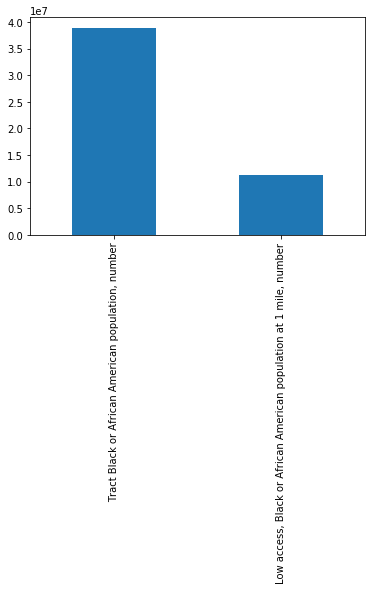

Tract Black or African American population, number                    3.892932e+07
Low access, Black or African American population at 1 mile, number    1.129574e+07
dtype: float64

In [23]:
plotNationalDoubleComparison(food_atlas_data,'Low access, Black or African American population at 1 mile, number','Tract Black or African American population, number')

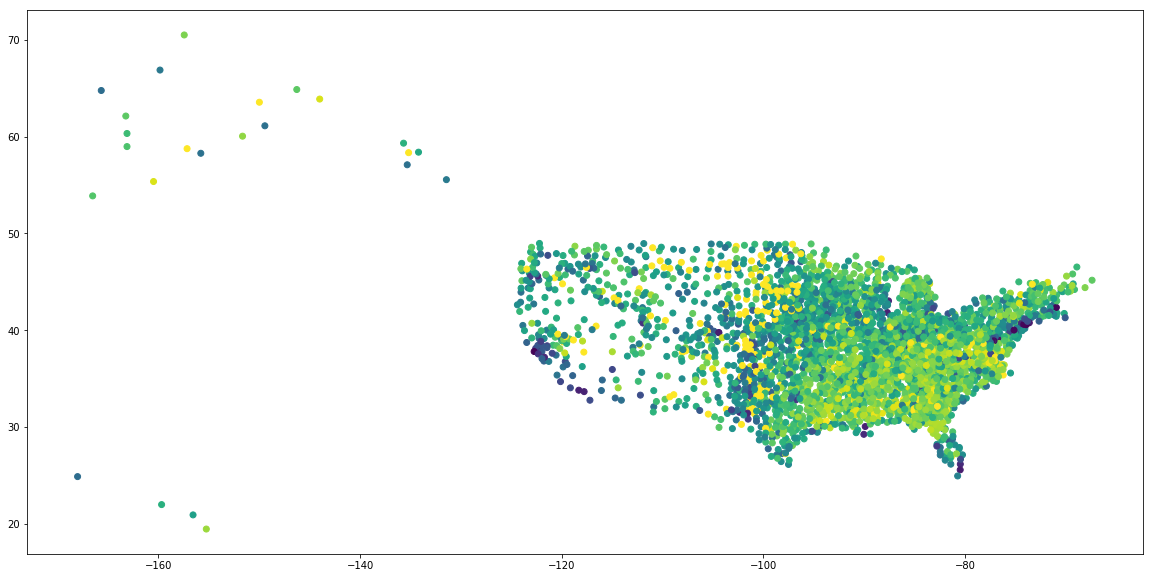

,State,County,"Tract White population, number","Low access, White population at 1 mile, number",ratio,zip_code,latitude,longitude,city,state,county,state_name
0,Alabama,Autauga,42855,28592.192359,0.667185,36749,32.510383,-86.813834,Jones,AL,Autauga,Alabama
1,Alabama,Baldwin,156153,114569.054526,0.733697,36580,30.468691,-87.703035,Summerdale,AL,Baldwin,Alabama
2,Alabama,Barbour,13180,9924.136304,0.752969,36072,31.826055,-85.166028,Eufaula,AL,Barbour,Alabama
3,Alabama,Bibb,17381,14775.827536,0.850114,36793,32.891444,-86.983385,Lawley,AL,Bibb,Alabama
4,Alabama,Blount,53068,48763.477093,0.918887,35133,33.845846,-86.586724,Remlap,AL,Blount,Alabama


In [24]:
whiteCountyDemoBreakdown= plotDoubleComparison(food_atlas_data,'Low access, White population at 1 mile, number','Tract White population, number')
whiteCountyDemoBreakdown.head()

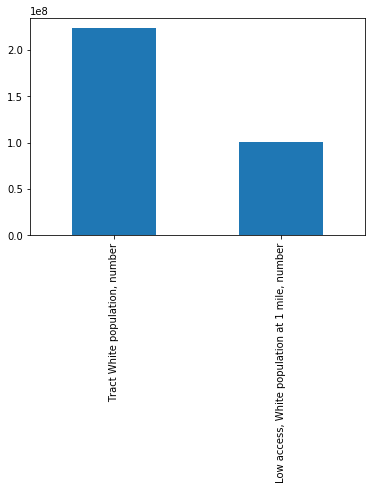

Tract White population, number                    2.235533e+08
Low access, White population at 1 mile, number    1.007398e+08
dtype: float64

In [25]:
plotNationalDoubleComparison(food_atlas_data,'Low access, White population at 1 mile, number','Tract White population, number')

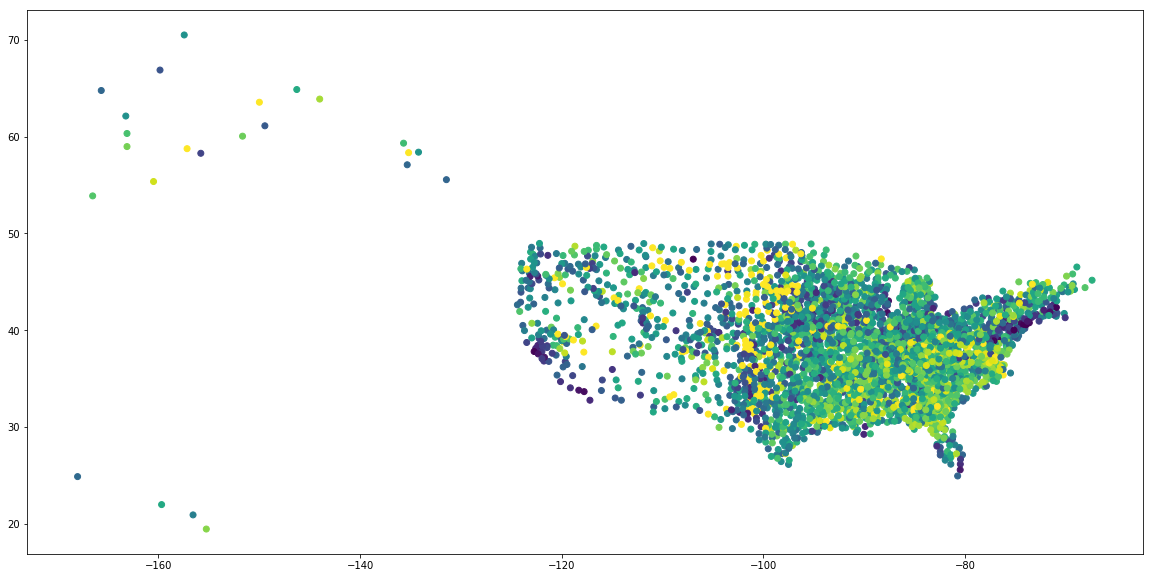

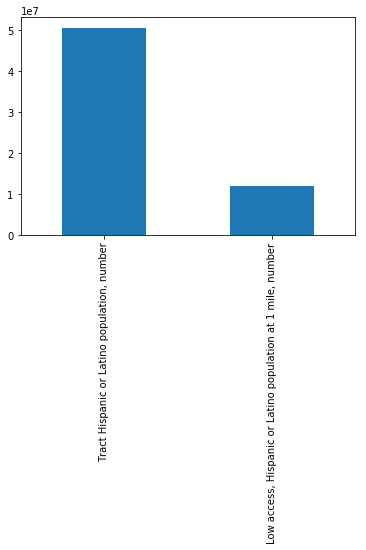

Tract Hispanic or Latino population, number                    5.047759e+07
Low access, Hispanic or Latino population at 1 mile, number    1.177554e+07
dtype: float64

In [26]:
plotDoubleComparison(food_atlas_data,'Low access, Hispanic or Latino population at 1 mile, number', 'Tract Hispanic or Latino population, number')
plotNationalDoubleComparison(food_atlas_data,'Low access, Hispanic or Latino population at 1 mile, number', 'Tract Hispanic or Latino population, number')

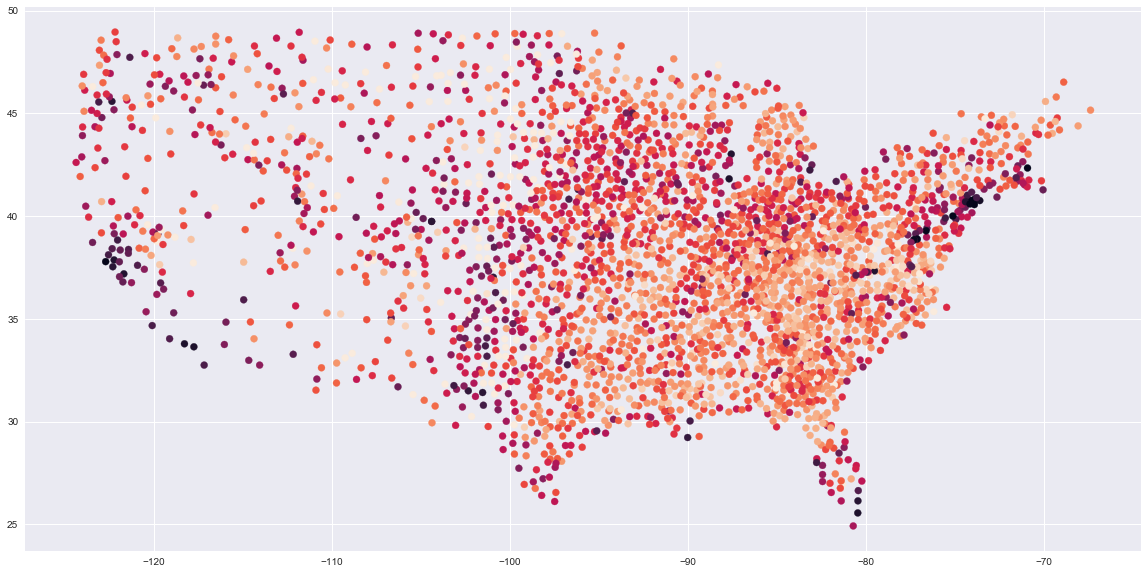

,State,County,"Population, tract total","Low access, population at 1 mile, number",ratio,zip_code,latitude,longitude,city,state,county,state_name
0,Alabama,Autauga,54571,36469.872893,0.668301,36749,32.510383,-86.813834,Jones,AL,Autauga,Alabama
1,Alabama,Baldwin,182265,131649.158741,0.722295,36580,30.468691,-87.703035,Summerdale,AL,Baldwin,Alabama
2,Alabama,Barbour,27457,19197.262383,0.699176,36072,31.826055,-85.166028,Eufaula,AL,Barbour,Alabama
3,Alabama,Bibb,22915,18918.377818,0.825589,36793,32.891444,-86.983385,Lawley,AL,Bibb,Alabama
4,Alabama,Blount,57322,52242.222280,0.911382,35133,33.845846,-86.586724,Remlap,AL,Blount,Alabama
5,Alabama,Bullock,10914,7390.754569,0.677181,36089,32.142191,-85.742406,Union Springs,AL,Bullock,Alabama
6,Alabama,Butler,20947,13017.986983,0.621473,36456,31.546733,-86.713793,Mc Kenzie,AL,Butler,Alabama
7,Alabama,Calhoun,118572,66034.328704,0.556913,36279,33.866182,-85.870970,Wellington,AL,Calhoun,Alabama
8,Alabama,Chambers,34215,21842.846052,0.638400,36863,32.900173,-85.296659,Lanett,AL,Chambers,Alabama
9,Alabama,Cherokee,25989,24041.181338,0.925052,36275,33.977829,-85.552143,Spring Garden,AL,Cherokee,Alabama


In [160]:
plotDoubleComparison(food_atlas_data2,'Low access, population at 1 mile, number','Population, tract total')

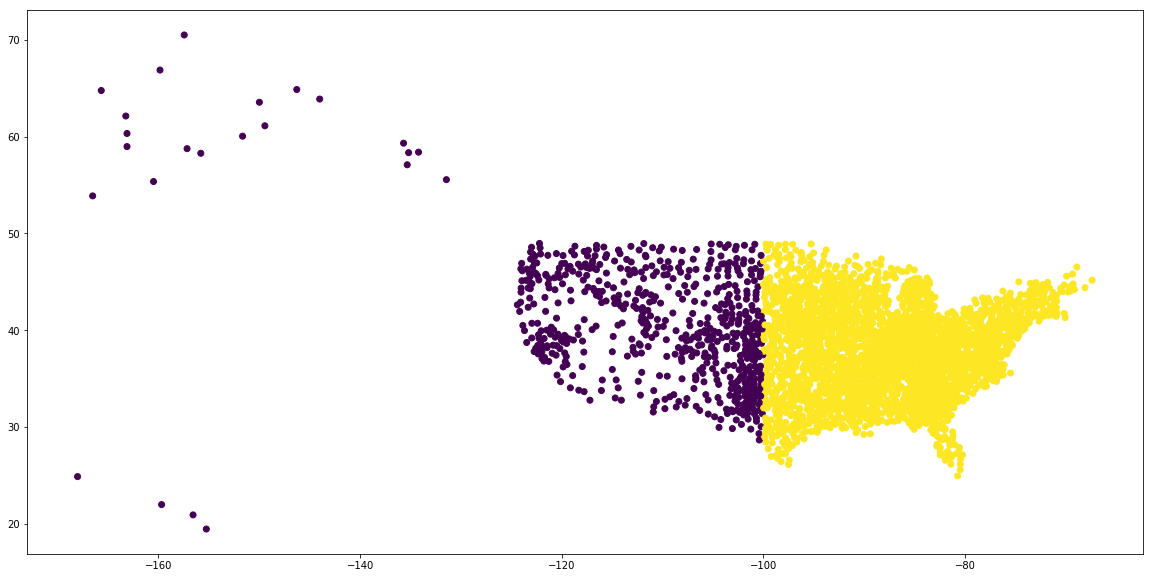

In [27]:
whiteCountyDemoBreakdown['testRatio'] = whiteCountyDemoBreakdown.apply(lambda x: 0.1 if x['longitude']<-100. else 0.9, axis = 1)
plotter.figure(figsize=(20,10))
plotter.scatter(whiteCountyDemoBreakdown['longitude'], whiteCountyDemoBreakdown['latitude'], c=whiteCountyDemoBreakdown['testRatio']*100.0)
plotter.show()

### Racial breakdown

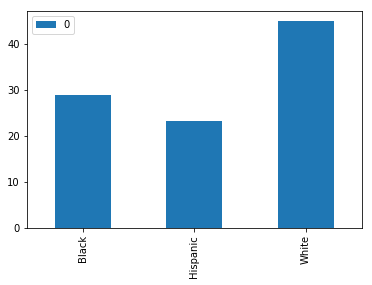

In [28]:
#racial breakdown over 1 mile from a grocer
pd.DataFrame(pd.Series({'Hispanic': 100* plotNationalDoubleRatio(food_atlas_data,'Low access, Hispanic or Latino population at 1 mile, number', 'Tract Hispanic or Latino population, number'),
'White': 100*plotNationalDoubleRatio(food_atlas_data,'Low access, White population at 1 mile, number','Tract White population, number'),
 'Black' : 100 * plotNationalDoubleRatio(food_atlas_data,'Low access, Black or African American population at 1 mile, number','Tract Black or African American population, number')})).plot(kind = 'bar')
plotter.show()

In [170]:
def racialQuartilePercents(quart=1):
    county_food_atlas_groupdata2 = food_atlas_data.groupby(['State','County'])[['Low access, Hispanic or Latino population at 1 mile, number', 'Tract Hispanic or Latino population, number','Low access, White population at 1 mile, number','Tract White population, number','Low access, Black or African American population at 1 mile, number','Tract Black or African American population, number','Population, tract total']].sum()
    #county_food_atlas_groupdata2['Hispanic_Ratio']=county_food_atlas_groupdata2['Low access, Hispanic or Latino population at 1 mile, number']/county_food_atlas_groupdata2['Tract Hispanic or Latino population, number']
    #county_food_atlas_groupdata2['White_Ratio']=county_food_atlas_groupdata2['Low access, White population at 1 mile, number']/county_food_atlas_groupdata2['Tract White population, number']
    #county_food_atlas_groupdata2['African_American_Ratio']=county_food_atlas_groupdata2['Low access, Black or African American population at 1 mile, number']/county_food_atlas_groupdata2['Tract Black or African American population, number']
    county_food_atlas_groupdata2.reset_index(inplace=True)
    county_food_atlas_groupdata2.head()
    county_food_atlas_loc_data2 = county_food_atlas_groupdata2.merge(code_lookups2, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
    county_food_atlas_loc_data2['Population Density'] = county_food_atlas_loc_data2['Population, tract total']/county_food_atlas_loc_data2['Area in square miles - Land area']
    county_food_atlas_loc_data2.sort_values('Population Density',ascending = True, inplace = True)
    dfSize =int( len(county_food_atlas_loc_data2)/4)
    #quart=2
    if quart !=5:
        lowerQuart = quart-1
        county_food_atlas_loc_data2 = county_food_atlas_loc_data2.iloc[lowerQuart*dfSize:quart*dfSize]
    county_food_atlas_loc_data2.head()
    plotter.figure(figsize=(10,5))
    #plotter.scatter(county_food_atlas_loc_data2['longitude'], county_food_atlas_loc_data2['latitude'], c=county_food_atlas_loc_data2['White_Ratio']*100.0)
    new_bars = county_food_atlas_loc_data2[['Low access, Hispanic or Latino population at 1 mile, number', 'Tract Hispanic or Latino population, number','Low access, White population at 1 mile, number','Tract White population, number','Low access, Black or African American population at 1 mile, number','Tract Black or African American population, number']]#'Hispanic_Ratio','White_Ratio','African_American_Ratio']]

    new_bars=new_bars.sum()
    new_bars['Hispanic_Ratio']=100*new_bars['Low access, Hispanic or Latino population at 1 mile, number']/new_bars['Tract Hispanic or Latino population, number']
    new_bars['White_Ratio']=100*new_bars['Low access, White population at 1 mile, number']/new_bars['Tract White population, number']
    new_bars['African_American_Ratio']=100*new_bars['Low access, Black or African American population at 1 mile, number']/new_bars['Tract Black or African American population, number']

    new_bars = new_bars[['Hispanic_Ratio','White_Ratio','African_American_Ratio']]

    new_bars.head()
    return new_bars
    


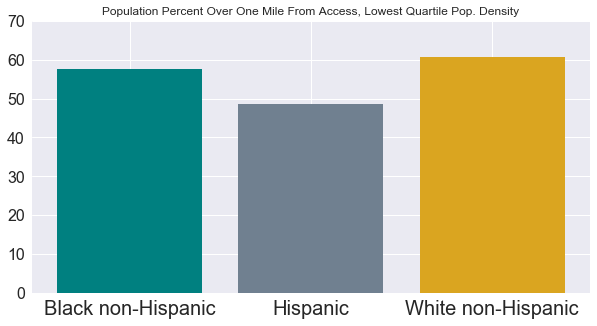

In [182]:
plotter.bar(['Hispanic','White non-Hispanic','Black non-Hispanic'],racialQuartilePercents(1).values.tolist(),color=['slategray','goldenrod','teal'])
plotter.title('Population Percent Over One Mile From Access, Lowest Quartile Pop. Density')
plotter.ylim(0,70)
plotter.yticks(fontSize=16)
plotter.xticks(fontSize=20)
#ax.set_xticklabels(['Hispanic','White non-Hispanic','Black non-Hispanic'],rotation='horizontal')#'Hispanic_Ratio','White_Ratio','African_American_Ratio'
plotter.show()

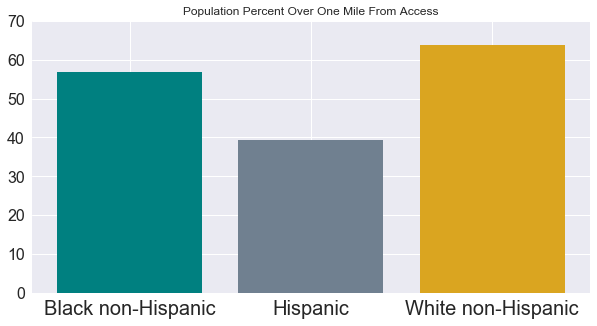

In [183]:
plotter.bar(['Hispanic','White non-Hispanic','Black non-Hispanic'],racialQuartilePercents(2).values.tolist(),color=['slategray','goldenrod','teal'])
plotter.title('Population Percent Over One Mile From Access')
plotter.ylim(0,70)
plotter.yticks(fontSize=16)
plotter.xticks(fontSize=20)
#ax.set_xticklabels(['Hispanic','White non-Hispanic','Black non-Hispanic'],rotation='horizontal')#'Hispanic_Ratio','White_Ratio','African_American_Ratio'
plotter.show()

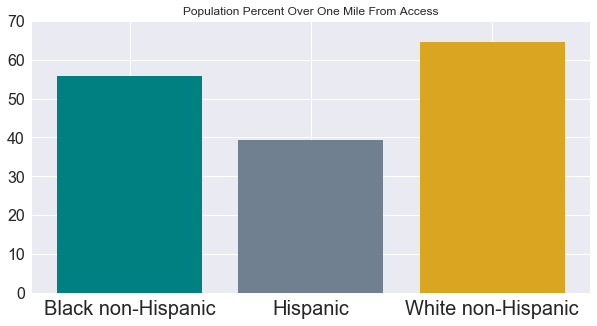

In [184]:
plotter.bar(['Hispanic','White non-Hispanic','Black non-Hispanic'],racialQuartilePercents(3).values.tolist(),color=['slategray','goldenrod','teal'])
plotter.title('Population Percent Over One Mile From Access')
plotter.ylim(0,70)
plotter.yticks(fontSize=16)
plotter.xticks(fontSize=20)
#ax.set_xticklabels(['Hispanic','White non-Hispanic','Black non-Hispanic'],rotation='horizontal')#'Hispanic_Ratio','White_Ratio','African_American_Ratio'
plotter.show()

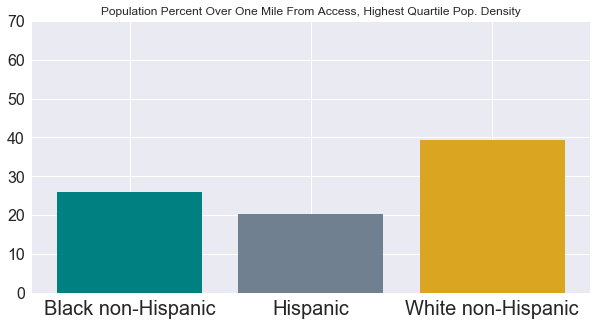

In [185]:
plotter.bar(['Hispanic','White non-Hispanic','Black non-Hispanic'],racialQuartilePercents(4).values.tolist(),color=['slategray','goldenrod','teal'])
plotter.title('Population Percent Over One Mile From Access, Highest Quartile Pop. Density')
plotter.ylim(0,70)
plotter.yticks(fontSize=16)
plotter.xticks(fontSize=20)
#ax.set_xticklabels(['Hispanic','White non-Hispanic','Black non-Hispanic'],rotation='horizontal')#'Hispanic_Ratio','White_Ratio','African_American_Ratio'
plotter.show()

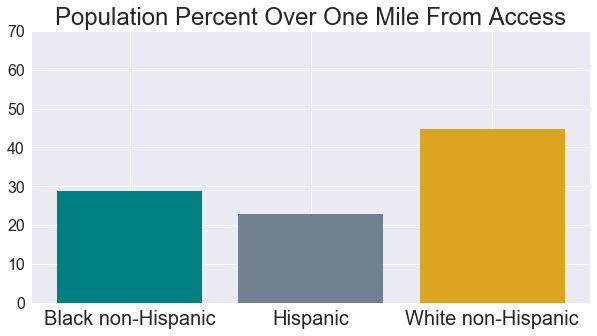

In [186]:
#fig,ax = plotter.subplots()
#racialQuartilePercents(5).plot(kind='bar', title='Population Percent Over One Mile From Access')
plotter.bar(['Hispanic','White non-Hispanic','Black non-Hispanic'],racialQuartilePercents(5).values.tolist(),color=['slategray','goldenrod','teal'])
plotter.title('Population Percent Over One Mile From Access',fontSize=24)
plotter.ylim(0,70)
plotter.yticks(fontSize=16)
plotter.xticks(fontSize=20)
#ax.set_xticklabels(['Hispanic','White non-Hispanic','Black non-Hispanic'],rotation='horizontal')#'Hispanic_Ratio','White_Ratio','African_American_Ratio'
plotter.show()

In [129]:
np.transpose(racialQuartilePercents(5).values.tolist())

array([ 22.93026335,  44.79137448,  28.80947607])

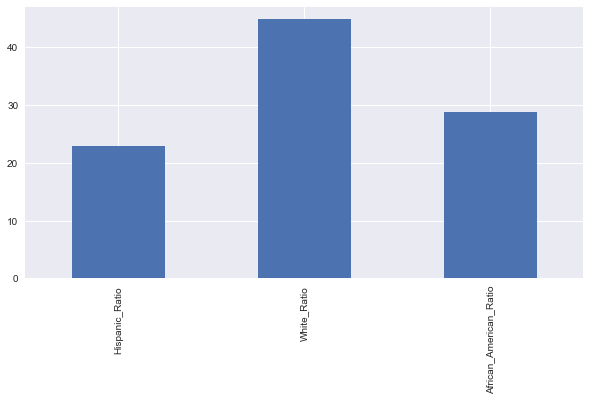

In [137]:
racialQuartilePercents(5).plot(kind='bar')
plotter.show()

In [146]:
chsi_data = pd.read_csv("DATA/communityHealthStatusIndicators_dataset/RISKFACTORSANDACCESSTOCARE.csv")
chsi_data.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,Few_Fruit_Veg,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,78.6,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,76.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,1,5,Barbour,Alabama,AL,51,-1111.1,-1111.1,-1111.1,-1111.1,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,1,7,Bibb,Alabama,AL,42,-1111.1,-1111.1,-1111.1,86.6,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,74.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


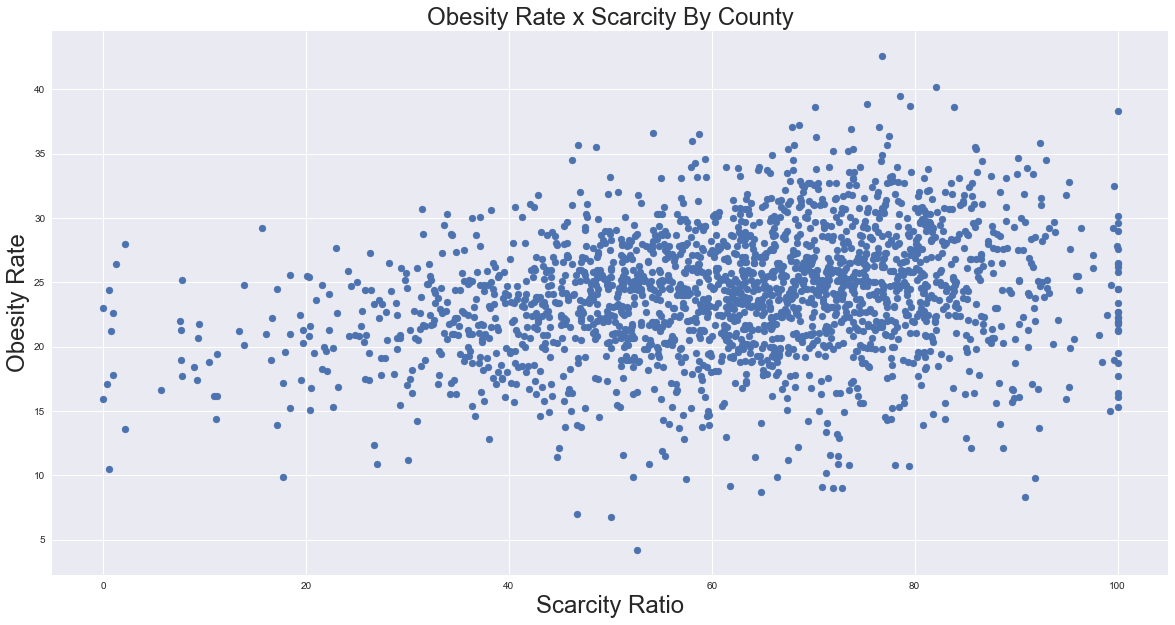

In [168]:

tempGroup = food_atlas_data.groupby(['State','County'])[['Low access, population at 1 mile, number','Population, tract total']].sum()
tempGroup['ratio']=tempGroup['Low access, population at 1 mile, number']/tempGroup['Population, tract total']
tempGroup.reset_index(inplace=True)
tempGroup.head()
temp_food_loc = tempGroup.merge(code_lookups, left_on = ['State','County'],right_on = ['state_name','county'],how='inner') 
temp_food_loc_health = temp_food_loc.merge(chsi_data,left_on = ['state_name','county'], right_on = ['CHSI_State_Name','CHSI_County_Name'],how='inner')
temp_food_loc_health.head()
#county_food_atlas_loc_data['Population Density'] = county_food_atlas_loc_data['Population, tract total']/county_food_atlas_loc_data['Area in square miles - Land area']
#county_food_atlas_loc_data.sort_values('Population Density',ascending = True, inplace = True)
#if quart !=5:
#    lowerQuart = quart-1
#    dfSize = len(county_food_atlas_loc_data)/4
#    county_food_atlas_loc_data = county_food_atlas_loc_data.iloc[lowerQuart*dfSize:quart*dfSize]
#county_food_atlas_loc_data.head()
#temp_food_loc_health['']
plotter.figure(figsize=(20,10))
temp_food_loc_health=temp_food_loc_health[temp_food_loc_health['Obesity']>=0]
plotter.scatter(temp_food_loc_health['ratio']*100, temp_food_loc_health['Obesity'])
plotter.xlabel("Scarcity Ratio",fontSize=24)
plotter.ylabel('Obesity Rate',fontSize=24)
plotter.title('Obesity Rate x Scarcity By County',fontSize=24)
plotter.show()
#return county_food_atlas_loc_data

In [158]:
tempGroup['Low access tract at 1 mile'].sum()

24322